# TP1

## Dimitris Proios



## Requirements install 

In [7]:
import matplotlib.pyplot as plt
import numpy as np



## Exercise 1 -- Noise and Metrics

### 1.a) Write a function that determines the Mean Squared Error (MSE) between two images x and y.

In MSE, the lower the error, the more "similar" the two images are
The two images must have the same dimension.

- MSE definition 

$ MSE = \frac{1}{N M} \sum{ _{i=1} ^{N}  \sum{ _{i=1} ^{M} (x[i,j] - y[i,j]) ^2}}$ 



In [61]:

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])	
	return err


Load 2 images to test functionality

In [ ]:
from PIL import Image
imA = Image.open('./data/hdr_images/img01.tif')
imA

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def readTifGrayScale(path):
    img = cv2.imread(path, -1)
    return img


def showTifGrayScale(img, title = ""):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.title(title)
    plt.show()
    

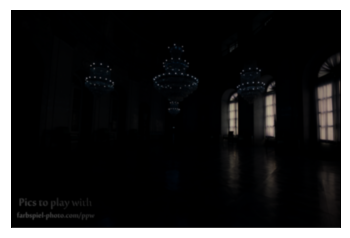

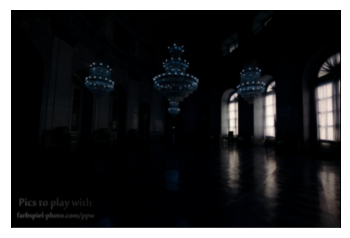

In [20]:
img1 = readTifGrayScale('./data/hdr_images/img01.tif')
img2 = readTifGrayScale('./data/hdr_images/img02.tif')
showTifGrayScale(img1)
showTifGrayScale(img2)


## 1.b)  Read in a new copy of the image cameraman.tif, keep it in its original datatype and range, i.e. uint8 and {0..255}.

In [21]:
imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam



array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 158, ..., 151, 152, 152],
       ...,
       [114, 132, 123, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 133, 130, 113]], dtype=uint8)

### 1.c)  Now read in a second copy of the image cameraman.tif but map it to double and {0..1}. See Matlab im2double. Compare the two images using the MSE. Can you explain the result?

The mse is 17842.766630867263
which I believe is correct since the mse is not immune to different range.
### Notes 
- For numpy reference of types I used this documentation https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html
- For the replaccement of im2doublle function I used https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html 



In [22]:
imgCam_double = np.array(imgCam).astype(np.float32)
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)
imgCam_double 

array([[0.60569106, 0.61788618, 0.61382114, ..., 0.58536585, 0.58943089,
        0.58943089],
       [0.62195122, 0.59756098, 0.6097561 , ..., 0.59756098, 0.60162602,
        0.59349593],
       [0.60569106, 0.61788618, 0.61382114, ..., 0.58536585, 0.58943089,
        0.58943089],
       ...,
       [0.43495935, 0.50813008, 0.47154472, ..., 0.5203252 , 0.52845528,
        0.43495935],
       [0.46341463, 0.48373984, 0.5       , ..., 0.51219512, 0.5       ,
        0.43089431],
       [0.46341463, 0.48373984, 0.5       , ..., 0.51219512, 0.5       ,
        0.43089431]])

In [8]:
imgCam_double.dtype 

dtype('float64')

In [9]:
mse(imgCam_double, imgCam )


17842.766630867263

## Exercise 2 
### 2.a) Refractor the PNSR definition such that the PSNR is expressed as a function of the noise variance $σ_z ^2 $. You may assume that $σ_z ^2  = MSE(x, y)$ 

- PSNR original definition 
<br> 

(1) $ PSNR = 10 \log_{10} \frac{a^2}{MSE(x,y)} $ 
<br>

(2) $MSE(x,y) = \sigma _{z} ^2 $
<br>

(1) (2) $ PSNR = 10 \log_{10} \frac{a^2}{\sigma _{z} ^2} $ 
<br> 

 $ PSNR = 20 \log_{10} a - 10\log_{10}{\sigma _{z} ^2}  $ 
<br> 

 $ PSNR - 20 \log_{10} a  = 10\log_{10}{\sigma _{z} ^2}  $ 
<br> 

 $ \frac{PSNR - 20 \log_{10} a }{10} = \log_{10}{\sigma _{z} ^2}  $ 
<br> 

 (3) $ 10^ {\frac{PSNR - 20 \log_{10} a }{10}} = \sigma _{z} ^2  $ 

This relationship above is used in 2.b.



### 2.b) Add Gaussian noise to an image such that the PSNR ratio with the original image is 10dB, 20dB, 30dB and 40dB. Use randn, not imnoise.


In [10]:
import math 
PSNRs = [10, 20, 30, 40]
getVarianceForPSNR = lambda db: 10**((db-20 * math.log(255, 10))/10)
varianceList = [(db, getVarianceForPSNR(db)) for db in PSNRs ]
varianceList


[(10, 0.00015378700499807824),
 (20, 0.0015378700499807825),
 (30, 0.015378700499807824),
 (40, 0.1537870049980782)]

- Noise function:
$Z_i= N(\mu, \sigma ^2 )$


original image


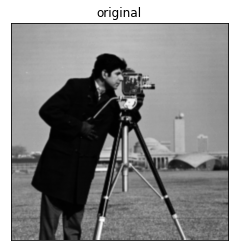

In [23]:
def gaussianNoise(image, var, mean = 0):
      row,col = image.shape
      sigma = var**0.5
      randomGaus = np.random.normal(mean,sigma,(row,col))
      gaussNoiseMatrix = randomGaus.reshape(row,col)
      noisy = image + gaussNoiseMatrix
      return noisy, gaussNoiseMatrix

imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam_double = np.array(imgCam).astype("float32")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)

print("original image")
showTifGrayScale(imgCam, "original")


### 2.c) Show the noisy images on the screen. How do they look?

They look bad the more db we have 


DB:  10
variance:  0.00015378700499807824
DB:  20
variance:  0.0015378700499807825
DB:  30
variance:  0.015378700499807824
DB:  40
variance:  0.1537870049980782


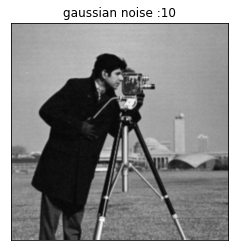

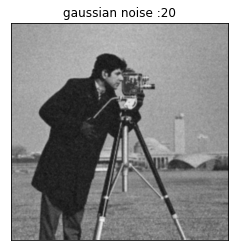

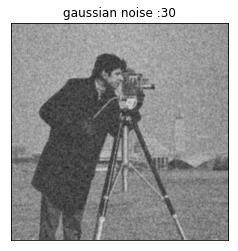

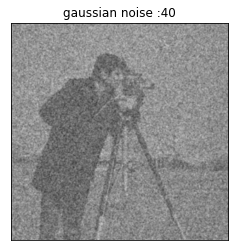

In [118]:
def experiment(db, variance, img):
    print("DB: ",db)
    print("variance: ", variance)
    noisedImgArray, gaussNoiseMatrix = gaussianNoise(img, variance)
    showTifGrayScale(noisedImgArray, "gaussian noise :" + str(db))
    return noisedImgArray
    
noised_images = [(db, experiment(db,var, imgCam_double )) for db,var in iter(varianceList)]


### 2.d) Show the histograms for these noisy images, can you explain what you see?
The more noisy the image the higher the difference wiht the original graph.
We see the count for every pixel value of the image.
Original image: 


In [119]:
def convertBack(im):
    imconv= np.interp(
        im, 
        (im.min(), im.max()), 
        (0, 255)
    )
    imconv = imconv.astype("uint8")
    return imconv

def hist(img):
    imconv = convertBack(img)
    hist , bins = np.histogram(imconv.ravel(),256,[0,256])
    plt.hist(hist, bins= bins)
    plt.show()


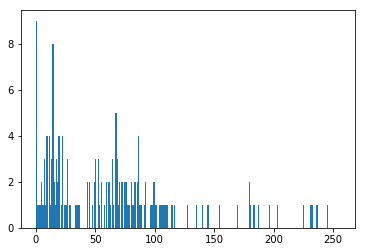

AttributeError: 'int' object has no attribute 'min'

In [120]:
hist(imgCam_double)
from matplotlib import pyplot as plt
[ hist(im) for im, db in iter(noised_images)]


### 2.e.1) Add salt & pepper Noise to an image until the PSNR ratio between the original and the noisy image is 40 dB. 


mse:  5.0223443377190536e-05
psnr:  42.99093514871857


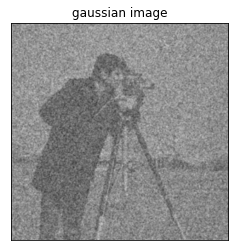

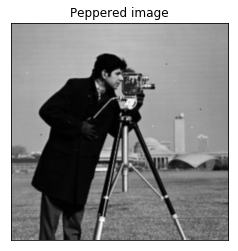

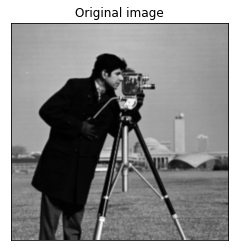

In [136]:
import copy 
def psnr(mseres):
    PIXEL_MAX_SQUARE = 1
    mse_square = math.sqrt(mseres )
    part1 =  math.log10(PIXEL_MAX_SQUARE / mse_square)
    return 20 * part1

imgCam = readTifGrayScale('./data/cameraman.tif')
imgCam_double = np.array(imgCam).astype("float32")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)

def get_img_with_pepper_salt_noise(img, p, q):
    im = copy.deepcopy(img)
    randnums = np.random.rand(256,256)
    im[np.logical_and(randnums > p, randnums < q)] = 1
    im[ randnums <= p] = 0
    return im 

pepperedImg = get_img_with_pepper_salt_noise(imgCam_double, p=0.00015, q=0.0003)
mseNum  = mse(imgCam_double,pepperedImg)
print("mse: ", mseNum)
print("psnr: ", psnr(mseNum))
showTifGrayScale(noised_images[3][1], "gaussian image")
showTifGrayScale(pepperedImg, "Peppered image")
showTifGrayScale(imgCam_double, "Original image")


### 2.e.2) Visually compare it to the 40dB noisy image to which Gaussian noise was added. What can you conclude?
With salt and pepper noise function the picture is barely modified at 40db.
While with gaussia noise it is geavily modified.

To validate that the salt and pper nois is coorectly implemented I will try to augmenta the noise heavily.

In [ ]:
pepperedImg = get_img_with_pepper_salt_noise(imgCam_double, p=0.15, q=0.3)
mseNum  = mse(imgCam_double,pepperedImg)
print("mse: ", mseNum)
print("psnr: ", psnr(mseNum))
showTifGrayScale(pepperedImg, "Peppered image")


Exercise 3. Read the image peppers.png and convert it to grayscale. Perform its low-rank
approximation for k = 1, ..., n. Plot the dependence between the k and MSE of k-rank approx-
imation version of original image. Make a conclusion.



In [2]:
import matplotlib.image as mpimg
imagePepperMatrix = mpimg.imread("./data/peppers.png")
imagePepperMatrix

array([[[0.24608225, 0.11717403, 0.25389487],
        [0.24998856, 0.12498665, 0.25389487],
        [0.24998856, 0.13670558, 0.25389487],
        ...,
        [0.25389487, 0.11717403, 0.2265507 ],
        [0.24998856, 0.11326772, 0.21873808],
        [0.25389487, 0.11326772, 0.21873808]],

       [[0.24998856, 0.12498665, 0.24608225],
        [0.24217594, 0.12498665, 0.25389487],
        [0.23436332, 0.12889296, 0.25389487],
        ...,
        [0.24217594, 0.10936141, 0.21873808],
        [0.23045701, 0.10936141, 0.21483177],
        [0.22264439, 0.10936141, 0.22264439]],

       [[0.25780118, 0.11717403, 0.23826963],
        [0.24998856, 0.12108034, 0.24608225],
        [0.24998856, 0.12498665, 0.24998856],
        ...,
        [0.25389487, 0.1054551 , 0.21873808],
        [0.24608225, 0.10936141, 0.2265507 ],
        [0.2265507 , 0.10936141, 0.2265507 ]],

       ...,

       [[0.4687419 , 0.28123903, 0.53514916],
        [0.46483558, 0.2734264 , 0.53514916],
        [0.4726482 , 0

In [3]:
plt.imshow(imagePepperMatrix)


NameError: name 'plt' is not defined

## Low rank approximation via SVD


In [4]:
imagePepperMatrix.shape

(384, 512, 3)

In [5]:
U, S, VT = np.linalg.svd(imagePepperMatrix)

NameError: name 'np' is not defined

In [178]:
# Keep k left
U.shape

(384, 512, 512)

In [181]:
# keep
S.shape

(384, 3)

In [184]:
VT.shape

(384, 3, 3)

In [179]:
U[0][0][0]



-0.042403836

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

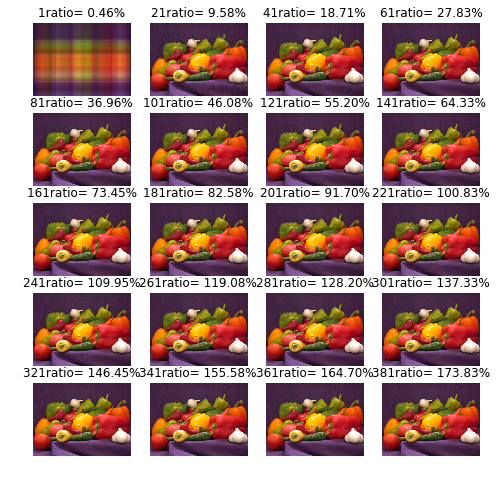

In [18]:

def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = np.linalg.svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s


def compress_show_color_images_layer(image,k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    
    compression_ratio =100.0*3* (
            k*(original_shape[0] + original_shape[1])+k)/(
            original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("k=" + str(k) + str("ratio= {:.2f}".format(compression_ratio)+"%" ))
    plt.axis('off')
    return image_reconst
    # plt.imshow(image_reconst)
    # plt.show()


w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    # img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    img = compress_show_color_images_layer(imagePepperMatrix,k)
    plt.imshow(img)
    k+= 20 

plt.show()
    
# interact(compress_show_color_images_layer,img_name=list(color_images.keys()),k=(1,550));
# [compress_show_color_images_layer(imagePepperMatrix, k) for k in range(1,20 )]
